<a href="https://colab.research.google.com/github/Yogeshpvt/Deep-Learning-Based-Food-Recognition-and-Calorie-Estimation-for-Indian-Food-Images/blob/main/Global_Context_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Concatenate, Flatten, Dense, Input
from tensorflow.keras.models import Model
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Calorie/yolov5/data/images

/content/drive/MyDrive/Colab Notebooks/Calorie/yolov5/data/images


In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Concatenate
from tensorflow.keras import Model

# Network architecture that explicitly models global contextual information (Actual Implementaion is Confidential until publishing)

# Backbone
def create_backbone(input_tensor):
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_tensor)
    return x

# Gloabl ConText Module

class MCTXModule(tf.keras.layers.Layer):
    def __init__(self, num_context_variables, num_labels):
        super(MCTXModule, self).__init__()
        self.num_context_variables = num_context_variables
        self.num_labels = num_labels

    def build(self, input_shape):
        self.conv1x1 = Conv2D(128, (1, 1), activation='relu')
        self.flatten = Flatten()
        self.dense = Dense(self.num_labels)

    def call(self, inputs):
        smallest_scale_tensor = inputs[0]
        concatenated = Concatenate(axis=-1)(inputs)
        mctx_output = self.conv1x1(concatenated)
        flattened = self.flatten(mctx_output)
        classification_output = self.dense(flattened)
        return classification_output

# Head
def create_yolo_head(backbone_output):
    # Head Architecture
    num_boxes = 7  # No of anchor boxes
    num_classes = 35  # No of classes
    yolo_head_output = Conv2D(num_boxes * (num_classes), (1, 1), activation='linear')(backbone_output)
    return yolo_head_output


input_tensor = tf.keras.layers.Input(shape=(416, 416, 3))

#Backbone
backbone_output = create_backbone(input_tensor)

mctx_module = MCTXModule(num_context_variables=64, num_labels=10)
mctx_output = mctx_module([backbone_output])

#bounding box prediction and class probabilities
yolo_head_output = create_yolo_head(backbone_output)
yolo_head_output_flatten = Flatten()(yolo_head_output)

# Combining Backbone, Global information, and YOLO Head
final_output = Concatenate()([mctx_output, yolo_head_output_flatten])

# Defining the new model
yoloc_model = Model(inputs=input_tensor, outputs=final_output)

yoloc_model.compile(optimizer='adam', loss=['binary_cross_entropy'], metrics=['accuracy'])  # loss function (We used binary cross entropy)

yoloc_model.summary() # layout

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 416, 416, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 416, 416, 245)        15925     ['conv2d_2[0][0]']            
                                                                                                  
 mctx_module_1 (MCTXModule)  (None, 10)                   2215200   ['conv2d_2[0][0]']            
                                                          10                                

In [3]:
#1 - INPUT from feature maps of backbone network

#2 - Conversion to Smallest Scale

#3 - Concatenation

#4 - 1 X 1 Convolution

#5 - Flattening

#6, #7 - Dense Layers for classification, Output

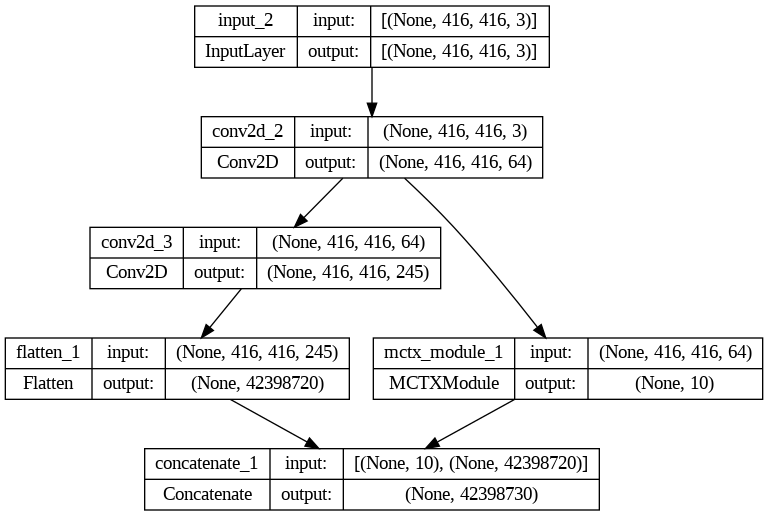

In [4]:
tf.keras.utils.plot_model(yoloc_model, show_shapes=True)

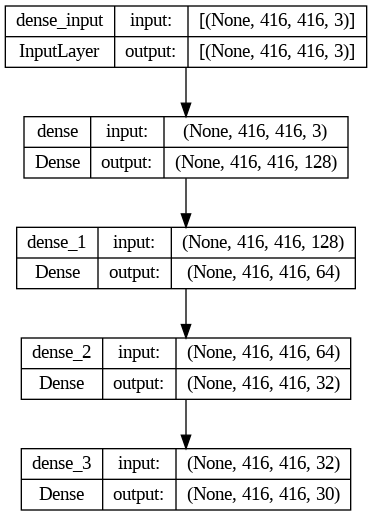

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

units_layer1 = 128
units_layer2 = 64
units_layer3 = 32

units_output = 30

#Sequential model
model = tf.keras.Sequential()

model.add(Dense(units_layer1, activation='relu', input_shape=(416,416,3)))
model.add(Dense(units_layer2, activation='relu'))
model.add(Dense(units_layer3, activation='sigmoid'))
model.add(Dense(units_output, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True)